<a href="https://colab.research.google.com/github/AnovaYoung/usd_projects/blob/main/EthicalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <div align="center">Discover, Measure, and Mitigate Bias in a Dataset

The idea of fairness within AI comes from the idea that not all data is created equal, whether it’s measuring human populations or words in a document. If an AI algorithm is measuring the potential risk within a contract or agreement, such as a loan approval,  the context matters. Fairness in a legal setting is measuring whether a public policy is being applied equally across different races, genders, ethnicities and so forth. Fairness in AI means planning for these differences in data to make the end result representative of the goal that developers are actually trying to have the AI process tackle. In assessing human and civil rights and individual and societal harms from AI systems, research indicates that many forms of bias occur at the data collection stage. As a result, practices and methods to introduce fairness metrics into AI development can identify unprivileged attributes and measure bias. Then, techniques can be introduced to mitigate bias and find fairness in the dataset.  Using applied ethical practices of fairness in AI processes can mitigate harms from bias and produce a more complete end product from the AI processes.

## Assignment Instructions
The three sections of this tutorial will guide you through steps to illustrate how bias in loan data can be discovered, measured, and mitigated using code techiques and metrics. The  data comes from a hypothetical loan processing dataset. The techniques in this tutorial can be used to discover biased subgroups, determine the amount of bias, and mitigate this bias.
<strong> Complete the tutorial steps in each section, and respond to the indicated questions </strong>

<a href='#explore_dataset'>Part 1 DISCOVER IMBALANCE</a>
 1. Import necessary libraries.
 2. Load the loan approval dataset.
 3. Explore the dataset characteristics to identify biased subgroups.<br>

<strong>Respond to prompt: Q1</strong>

<a href='#measure_bias'>Part 2 MEASURE BIAS</a><p></p>

1. Statistical Parity
2. Odds Ratio
3. Equal Opportunity Difference
4. Disparate Impact

<strong>Respond to prompts: Q2, Q3, Q4</strong>

<a href='#logistic_regression'>Part 3 MITIGATE BIAS</a><p></p>

1. Run a Baseline Logistic Regression on the Unbalanced / Biased Data
2. Run a Logistic Regression with Re-Weighting
3. Generate Synthetic Samples with SMOTE
4. Run a Logistic Regression with SMOTE
5. Logistic Regression with SMOTE + Re-Weighting
6. Aggregate Classification Reports for Comparison

<strong>Respond to prompts: Q5, Q6, Q7, Q8, Q9 and Q10</strong>

***

# Part 1 DISCOVER IMBALANCE <a id='explore_data'></a>

#### Import libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

#### Load the dataset

In [ ]:
#read data
data = pd.read_csvdata = pd.read_csv("/Users/anovayoungers/Downloads/loan_approval_biased.csv")

# Clone the dataset
data_clone = data.copy()


In [ ]:
data_clone.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002317,Male,Yes,3+,Graduate,No,81000,0.0,360,360,0,Rural,Y
1,LP002101,Male,Yes,0,Graduate,No,63337,0.0,490,180,1,Urban,Y
2,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600,180,0,Semiurban,Y
3,LP001640,Male,Yes,0,Graduate,Yes,39147,4750.0,120,360,1,Semiurban,Y
4,LP002422,Male,No,1,Graduate,No,37719,0.0,152,360,1,Semiurban,Y


In [ ]:
data_clone.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002949,Female,No,3+,Graduate,No,416,41667.0,350,180,1,Urban,N
610,LP002717,Male,Yes,0,Graduate,No,1025,5500.0,216,360,0,Rural,N
611,LP001259,Male,Yes,1,Graduate,Yes,1000,3022.0,110,360,1,Urban,N
612,LP001722,Male,Yes,0,Graduate,No,150,1800.0,135,360,1,Rural,N
613,LP002502,Female,Yes,2,Not Graduate,No,210,2917.0,98,360,1,Semiurban,N


Review the column headers and attributes.

In [ ]:
print(data_clone.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245798  156.050489        334.866450   
std        6109.041673        2926.248369   99.128597         79.599764   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  129.000000        360.000000   
75%        5795.000000        2297.250000  175.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.812704  
std          0.390467  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


<br>

In [ ]:
# Count the number of males and females in the dataset
gender_counts = data_clone['Gender'].value_counts()

# Print the counts
print("Counts of each gender in the dataset")
print(gender_counts)

Counts of each gender in the dataset
Male      497
Female    117
Name: Gender, dtype: int64


In [ ]:
# Create a label encoder object
le = LabelEncoder()

# List of columns to be label encoded
label_encoded_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Apply label encoding to each column of the cloned DataFrame
for col in label_encoded_columns:
    data_clone[col] = le.fit_transform(data_clone[col])


In [ ]:
data_clone['Dependents'] = data_clone['Dependents'].replace('3+', 3)

In [ ]:
data_clone.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002317,1,1,3,0,0,81000,0.0,360,360,0,0,1
1,LP002101,1,1,0,0,0,63337,0.0,490,180,1,2,1
2,LP001536,1,1,3,0,0,39999,0.0,600,180,0,1,1
3,LP001640,1,1,0,0,1,39147,4750.0,120,360,1,1,1
4,LP002422,1,0,1,0,0,37719,0.0,152,360,1,1,1


#### Determine the loan approval rates by gender. (0 = Female, 1 = Male)

In [ ]:
# Filter for approved loans
approved_loans = data_clone[data_clone['Loan_Status'] == 1]

# Count the number of approved loans for each gender
gender_approval_counts = approved_loans['Gender'].value_counts()

print(gender_approval_counts)

1    217
0      2
Name: Gender, dtype: int64


#### Create Correlation Heatmap to examine data for bias

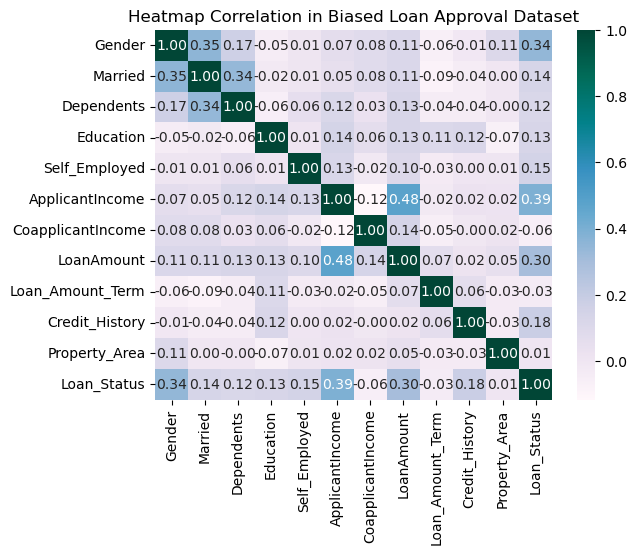

In [ ]:
eda_data = data.copy()

# Convert 'Gender' to numeric for visualization purposes only
# **Be mindful when converting "F" and "M" to 0 and 1. Converting gender to a binary can oversimplify a
# multidimensional aspect of human identity, could potentially reinforce stereotypes, and create a
# hierarcy.**

eda_data['Gender'] = eda_data['Gender'].map({'Female': 0, 'Male': 1})

# convert for heatmap
gender_stat = {"Female": 0, "Male": 1}
yes_no_stat = {"No" : 0,"Yes" : 1}
dependents_stat = {"0":0,"1":1,"2":2,"3+":3}
education_stat = {"Not Graduate" : 0, "Graduate" : 1}
property_stat = {"Semiurban" : 0, "Urban" : 1,"Rural" : 2}
status_stat = {"N" : 0, "Y" : 1}

eda_data["Gender"] = eda_data["Gender"].replace(gender_stat)
eda_data["Married"] = eda_data["Married"].replace(yes_no_stat)
eda_data["Dependents"] = eda_data["Dependents"].replace(dependents_stat)
eda_data["Education"] = eda_data["Education"].replace(education_stat)
eda_data["Self_Employed"] = eda_data["Self_Employed"].replace(yes_no_stat)
eda_data["Property_Area"] = eda_data["Property_Area"].replace(property_stat)
eda_data["Loan_Status"] = eda_data["Loan_Status"].replace(status_stat)

sns.heatmap(eda_data.corr(numeric_only=True), annot=True, fmt=".2f", cmap="PuBuGn")
plt.title("Heatmap Correlation in Biased Loan Approval Dataset")
plt.show()

***

### Q1 Based on the Correlation Heatmap, which observations can you make?
<p><font color='blue'>Graded cell &#9658;</font></p>

Response: Based on the provided correlation heatmap of the biased loan approval dataset, several observations can be made. The heatmap shows a relatively strong positive correlation between 'Married' status and the number of 'Dependents', suggesting that married applicants are likely to have more dependents. There is also a noteworthy positive correlation between 'ApplicantIncome' and 'LoanAmount', indicating that applicants with higher incomes tend to apply for larger loan amounts. This is intuitive, as individuals with greater income might have higher financial commitments or credit confidence. A significant positive correlation is observed between 'Credit_History'and 'Loan_Status' which underscores the impact of credit history on loan approval decisions. Interestingly, 'Loan_Amount_Term'does not show strong correlations with other variables, suggesting that the term of the loan is relatively independent of applicant characteristics in this dataset. Notably,'Gender' has a moderate positive correlation with 'Loan_Status'' hinting at a potential gender bias in loan approvals. The presence of such correlations warrants further investigation into the fairness of the loan approval process, as these correlations may reflect underlying biases in the decision-making process.

***

# PART 2: MEASURE THE BIAS <a id='measure_bias'></a>

In Part 2 you will examine four methods to measure bias in a dataset.

1. Statistial Parity  
2. Odds Ratio
3. Equal Opportunity Difference
4. Disparate Impact


### Statistical Parity

Statistical parity is the concept where a particular outcome or benefit is equally distributed across all groups in a population.  Simply put, it is a measurement of the difference in probabilities of a positive outcome across two groups. In an ideal and fair world, a statistical parity of 0 would be seen as ideal as it would indicate that there is no disparity in outcomes.

In [ ]:
# Filter the dataset for approved loans
approved_loans = data_clone[data_clone['Loan_Status'] == 1]

# Calculate the counts of approved loans for each gender
approved_counts = approved_loans['Gender'].value_counts()


In [ ]:
#calculate the total counts for each gender
gender_counts = data_clone['Gender'].value_counts()
print(gender_counts)

# Now, calculate the approval rates
approval_rate_male = approved_counts[1] / gender_counts[1]  # 1 is Male
approval_rate_female = approved_counts[0] / gender_counts[0]  # 0 is Female

# Print the approval rates
print(f"Loan Approval Rate for Males: {approval_rate_male:.2f}")
print(f"Loan Approval Rate for Females: {approval_rate_female:.2f}")

# Compare the rates to check for statistical parity
parity_difference = abs(approval_rate_male - approval_rate_female)
print(f"Difference in Approval Rates: {parity_difference:.2f}")


1    497
0    117
Name: Gender, dtype: int64
Loan Approval Rate for Males: 0.44
Loan Approval Rate for Females: 0.02
Difference in Approval Rates: 0.42


### Odds Ratio

The odds ratio is a measure of association between an exposure and an outcome. In the context of loan approvals for this dataset, it would be the ratio of the odds of a loan being approved for females to the odds of a loan being approved for males.

The odds of approval are calculated as the ratio of loans approved to those not approved. For instance, if 20 loans are approved and 80 are not, the odds of approval would be 20/80 or 0.25.

To calculate the odds ratio (OR):

OR = Odds Female / Odds Male

If OR > 1, it implies higher odds of approval for females; OR < 1 implies lower odds of approval for females compared to males.

In [ ]:
# calculate odds for each gender
odds_female = data_clone[data_clone['Gender'] == 0]['Loan_Status'].mean() / (1 - data_clone[data_clone['Gender'] == 0]['Loan_Status'].mean())
odds_male = data_clone[data_clone['Gender'] == 1]['Loan_Status'].mean() / (1 - data_clone[data_clone['Gender'] == 1]['Loan_Status'].mean())

# Calculate Odds Ratio
odds_ratio = odds_female / odds_male

# Print results
print(f"Odds Ratio: {odds_ratio}")



Odds Ratio: 0.022440392706872377


### Eqaual Opportunity Difference (EOD)

Equal opportunity difference is a fairness metric that measures the difference in the true positive rates (sensitivity) between two groups. In this dataset, it is the difference in the rate at which loans are correctly approved for females and males.

To calculate equal opportunity difference (EOD):

EOD = TPRfemale - TPRmale

Here, TPR (True Positive Rate) is the proportion of actual positives that are correctly identified as such (e.g., the proportion of qualified loan applicants who are correctly approved).

If EOD is zero, there is no disparity in approval rates between genders; if EOD is positive, females have a higher rate of correct approval; if EOD is negative, males have a higher rate of correct approval.

In [ ]:

# Calculate True Positive Rates for each gender
tpr_female = data_clone[(data_clone['Gender'] == 0) & (data_clone['Loan_Status'] == 1)].shape[0] / data_clone[data_clone['Gender'] == 0].shape[0]
tpr_male = data_clone[(data_clone['Gender'] == 1) & (data_clone['Loan_Status'] == 1)].shape[0] / data_clone[data_clone['Gender'] == 1].shape[0]

# Calculate Equal Opportunity Difference
equal_opportunity_difference = tpr_female - tpr_male

# Print results
print(f"Equal Opportunity Difference: {equal_opportunity_difference}")

Equal Opportunity Difference: -0.41952570121584204


## Disparate Impact


Disparate impact refers to a concept used primarily in employment and anti-discrimination law, though it also applies to other areas such as housing and lending. It occurs when a seemingly neutral policy, criterion, or practice has a disproportionately negative effect on a specific group of people, particularly when that group is defined by characteristics such as race, gender, age, or disability, even when there is no intential discrimination.


#### Loan_Approval Disparate Impact (DI) in Females
The industry standard for determining disparate impact in loan approvals often revolves around  a rule know as the 80% rule, or four-fifths rule. (This guideline is used in the United States by the Equal Employment Opportunity Commission and is often referenced in other areas such as lending practices under fair lending laws.)

*Important to note that is a guideline, not a law in lending.

#### Initial Approval Rates by Gender

In [ ]:
# Calculate initial approval rates by gender
approval_rates = data_clone.groupby('Gender')['Loan_Status'].mean()

# Print initial approval rates
print("Initial Approval Rates by Gender:Female = 0, Male = 1")
print(approval_rates)

Initial Approval Rates by Gender:Female = 0, Male = 1
Gender
0    0.017094
1    0.436620
Name: Loan_Status, dtype: float64


In [ ]:
# Calculate initial disparate impact

#approval rates of females / approval rates of males
initial_di = approval_rates[0] / approval_rates[1]

print("Initial Disparate Impact")
print(initial_di)

Initial Disparate Impact
0.03915081334436174


### Q2 After examining the results of the statistical parity, the odds ratio, the equal opportunity distance, and the disparate impact, what can you conclude from the data?
<p>Graded cell &#9658;</p>

Response:

The analysis of the bias measurement methods reveals a considerable gender bias in the loan approval process within the dataset. Starting with statistical parity, we observe a striking difference in approval rates: males have an approval rate of 44%, whereas females have an approval rate of only 2%, yielding a difference of 42%. This disparity suggests that the likelihood of getting a loan approved is substantially skewed in favor of male applicants.

The odds ratio further quantifies the association between gender and loan approval. With an odds ratio of approximately 0.022, the odds of loan approval for females are significantly lower than for males. In practical terms, this means that the chance of a loan being approved for a female applicant is only about 2.2% of the approval chance for a male, which is alarmingly low and signals strong gender bias.

Looking at the equal opportunity difference, which measures the true positive rates, we find a negative value of approximately -0.42. This indicates that males have a much higher rate of correct loan approvals compared to females, reinforcing the conclusion that the system is unfairly biased against female applicants.

Finally, the disparate impact measure, with a value of approximately 0.039, is far below the 0.8 threshold of the four-fifths rule. This suggests a severe disparate impact on female applicants, as their approval rate is less than 4% of the approval rate for males. Such a low value is a clear indicator of bias and could be considered discriminatory under certain anti-discrimination standards.

All four metrics point to the same conclusion: there is a pronounced gender-based bias in the loan approval process as per the given dataset, which poses serious fairness and ethical concerns.

### Q3. Which types of potential bias can you identify in this loan approval dataset? Provide specific examples and explain how the bias you identified is reflected in the data.
<p>Graded cell &#9658;</p>

Response:

Gender Bias: This is the most evident form of bias in the dataset. For example, the statistical parity shows a large gap in loan approval rates between genders, with a 42% difference favoring males over females. This suggests that the dataset, or the process leading to these outcomes, might be affected by gender bias where one gender is favored over the other in loan approvals.

Selection Bias: Given the substantial differences in approval rates between different groups, there's a possibility that the data collection process may have inherent selection biases. For instance, if the dataset primarily includes males with certain favorable attributes that are not as common in females, it could skew the approval rates observed.

Algorithmic Bias: If the model trained on this dataset learns from the biased approval rates, the algorithm itself may perpetuate or even amplify this bias. The odds ratio and equal opportunity difference support this, showing that females are significantly less likely to have loans approved compared to males, which could be a result of the algorithm disproportionately weighing certain features that disadvantage female applicants.

Historical Bias: The data may reflect historical inequalities in loan approvals. For instance, if historically, certain demographics (like males in this and many instances) have been more likely to be approved for loans due to societal norms or discrimination, the model will likely continue this trend unless corrective measures are taken.

Confirmation Bias: If loan officers are making decisions that contribute to this data, they may be influenced by confirmation bias. This means they could be more likely to approve loans for individuals who fit their preconceived notions of "creditworthiness," which might often be males, as suggested by the higher approval rates.

### Q4. If unaddressed, how can the biases you identified affect: a.) individuals, b.) enterprises, and c.) society?
<p>Graded cells &#9658;</p>


Response:[Individuals]

For applicants, these biases can lead to unfair treatment, where equally qualified individuals receive different outcomes based on gender. This can affect an individual's ability to obtain housing, education, or start a business -- impacting their economic stability and future opportunities.

Response:[Organizations]

 Businesses that rely on this biased AI system for loan approvals may inadvertently engage in discriminatory practices, which can lead to legal repercussions and damage to their reputation. Moreover, they may miss out on profitable ventures by overlooking qualified applicants due to biased assessments.

Response:[Society]

At a societal level, systemic bias can exacerbate already prevalent socio-economic divides. If certain demographics are consistently denied loans, it can hinder the overall economic development of these groups, perpetuate poverty cycles, and contribute to social stratification. Moreover, it undermines public trust in financial institutions and technology(which already sits precariously), potentially slowing down innovation adoption due to ethical concerns.

***

# Part 3 MITIGATE THE BIAS <a id='logistic_regression'></a>

In this portion of the assignment, you will assess the impact of re-weighting, generating synthetic samples (with SMOTE), and a combining re-weighting and synthetic samples on a logistic regression. You will then assess performance and the trade-offs through comparison of their evaluation metrics.
***
1. Run a Baseline Logistic Regression on the Unbalanced / Biased Data
2. Run a Logistic Regression with Re-Weighting
3. Generate Synthetic Samples with SMOTE
4. Run a Logistic Regression with SMOTE
5. Logistic Regression with SMOTE + Re-Weighting
6. Aggregate Classification Reports for Comparison

### Run a Baseline Logistic Regression on the Unbalanced / Biased Data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
# Define your features (X) and target variable (y)
X = data_clone.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = data_clone['Loan_Status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=531)

# Train a logistic regression model on the original data
logreg = LogisticRegression(max_iter=10000)
logreg.fit(X_train, y_train)

# Evaluate the model
y_pred = logreg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.93      0.89        75
           1       0.88      0.75      0.81        48

    accuracy                           0.86       123
   macro avg       0.87      0.84      0.85       123
weighted avg       0.86      0.86      0.86       123



### Run a Logistic Regression with Re-Weighting

<p><font color='blue'>Graded cell &#9658;</font></p>

In [ ]:

#Approval Rate for Females before re-weighting = 1.7094%
#Approval Rate for Males before re-weighting = 43.6620%

#DI equation: Pr(Y=1 | D=unprivileged) / Pr(Y=1 | D=privileged)

#plugging the numbers in ---> new weight for females = (0.8 * 43.6620%) / 1.7094  ≈ 20.5


# Define the class weights for re-weighting
# It could potentially be worthwhile to try different weights
class_weights = {0: 20.5, 1: 1}  # (Re-weight females)

# Create the logistic regression model with class weights




# Generate Synthetic Samples with SMOTE

### Using SMOTE to generate synthetic samples from the minority class (females) to help balance the data.
    

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling method to balance datasets. It works by creating synthetic samples from the minority class (in this case, 'Female' if we consider 'Gender' for minority oversampling, or 'N' for 'Loan_Status' if we are considering the outcome) instead of creating copies. This is done by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

1.) Before applying SMOTE, the dataset should be split into training and testing sets.

2.) SMOTE should only be applied to the training set.(SMOTE generates synthetic samples based on the existing minority
    class in the data applying it to your test set would introduce synthetic data into the set that you'll use for
    validation, which can lead to overly inflated performance estimates.)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=531)

# Apply SMOTE to the training data only!
smote = SMOTE(random_state=531)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


# Run a Logistic Regression with SMOTE

<p><font color='blue'>Graded cell &#9658;</font></p>

In [ ]:
# Train a logistic regression model on the SMOTE data

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=531)

smote = SMOTE(random_state=531)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])

print(report)



              precision    recall  f1-score   support

     Class 0       0.89      0.77      0.83        75
     Class 1       0.71      0.85      0.77        48

    accuracy                           0.80       123
   macro avg       0.80      0.81      0.80       123
weighted avg       0.82      0.80      0.81       123



# Logistic Regression with SMOTE + Re-Weighting

<p><font color='blue'>Graded cell &#9658;</font></p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=531)

smote = SMOTE(random_state=531)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# SMOTE data with re-weighting
model_with_reweighting = LogisticRegression(class_weight='balanced')
model_with_reweighting.fit(X_train_smote, y_train_smote)

y_pred_reweighting = model_with_reweighting.predict(X_test)

report_reweighting = classification_report(y_test, y_pred_reweighting, target_names=['Class 0', 'Class 1'])

print(report_reweighting)

              precision    recall  f1-score   support

     Class 0       0.89      0.77      0.83        75
     Class 1       0.71      0.85      0.77        48

    accuracy                           0.80       123
   macro avg       0.80      0.81      0.80       123
weighted avg       0.82      0.80      0.81       123



# Aggregate Classification Reports for Comparison

<p><font color='blue'>Graded cell &#9658;</font></p>

In [ ]:
# Combining the reports into a single summary
combined_report = f"""
Baseline Logistic Regression Report:
{report}

Logistic Regression with SMOTE Report:
{smote}

Logistic Regression with SMOTE + Re-Weighting Report:
{report_reweighting}
"""

print(combined_report)



Baseline Logistic Regression Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.77      0.83        75
     Class 1       0.71      0.85      0.77        48

    accuracy                           0.80       123
   macro avg       0.80      0.81      0.80       123
weighted avg       0.82      0.80      0.81       123


Logistic Regression with SMOTE Report:
SMOTE(random_state=531)

Logistic Regression with SMOTE + Re-Weighting Report:
              precision    recall  f1-score   support

     Class 0       0.89      0.77      0.83        75
     Class 1       0.71      0.85      0.77        48

    accuracy                           0.80       123
   macro avg       0.80      0.81      0.80       123
weighted avg       0.82      0.80      0.81       123




### Q5. Briefly discuss the techniques used to address dataset imbalance and bias. What are the advantages and limitations of each method?

### 1. Baseline Logistic Regression
**Advantages:**
- **Simplicity:** Logistic regression is super straightforward to implement and interpret which makes it a good baseline to understand the dataset's initial state.
- **Efficiency:** It's computationally less expensive compared to more complex models, allowing for quick iteration.

**Limitations:**
- **Performance on Imbalanced Data:** Without adjustments, logistic regression might not perform well on imbalanced datasets, as it could be biased towards the majority class.
- **Assumption of Linearity:** The model assumes a linear relationship between the independent variables and the log odds of the dependent variable, which might not always be true.

### 2. SMOTE
**Advantages:**
- **Balancing Classes:** By generating synthetic examples of the minority class, SMOTE helps balance the dataset, that can potentially improve model performance on minority classes.
- **Enhanced Decision Boundary:** With more examples of the minority class the model can learn a better decision boundary between the classes.

**Limitations:**
- **Overfitting:** There's a risk of overfitting to the minority class, as synthetic samples may overemphasize specific patterns that aren't as prevalent in the real-world data.
- **Complexity in High Dimensions:** In datasets with high dimensionality, generating meaningful synthetic samples becomes challenging and can lead to poorer model performance.

### 3. Logistic Regression with SMOTE + Re-Weighting
**Advantages:**
- **Balanced Attention:** Combining SMOTE with re-weighting ensures that the model pays balanced attention to both classes, potentially leading to more equitable predictions.
- **Customizability:** Re-weighting allows for customization based on the importance or cost of misclassifications, offering a tailored approach to addressing bias.

**Limitations:**
- **Parameter Sensitivity:** Finding the right balance with re-weighting requires careful tuning, and the optimal parameters might vary significantly between datasets.
- **Increased Complexity:** The combination of techniques adds layers of complexity to the modeling process, requiring more computational resources and potentially making the model harder to explain.

### Q6. What are the impacts of bias and imbalance on model performance? How do imbalanced and biased datasets affect the performance of machine learning models?

Response:

Bias and imbalance in datasets can significantly impair the performance of machine learning models by skewing their predictions and affecting their generalizability. In the context of imbalanced datasets models are ussually biased towards the majority class, leading to higher prediction accuracy for the majority class at the expense of the minority class. This is because the model has been exposed to more examples of the majority class during training and thus learns to predict these more frequently, potentially overlooking the minority class. This can result in a model that performs well according to overall accuracy metrics but poorly in terms of precision, recall, and F1 score for the underrepresented class. Similarly, biased datasets can cause models to learn and perpetuate these biases, leading to unfair or discriminatory outcomes. For example, if a loan approval model is trained on data where a certain demographic group is underrepresented or historically disadvantaged, the model may unjustly favor or disfavor loan approvals for individuals from that group. Consequently, bias and imbalance not only affect the fairness and equity of model predictions but also compromise the model's ability to make accurate predictions across diverse scenarios, limiting its usefulness in real-world applications.

### Q7. How might a model might perform well in terms of accuracy but still be biased?

Response:

A model may exhibit high overall accuracy but still harbor bias due to the nature of how accuracy is calculated and the underlying distribution of the dataset. Accuracy measures the proportion of true results (both true positives and true negatives) among the total number of cases examined. In a dataset with significant class imbalance, where one class vastly outnumbers the other, a model can achieve high accuracy simply by predicting the majority class for all instances. For example, in a loan approval dataset where the vast majority of applicants are approved (the majority class), a model that naively approves every application will still have high accuracy, despite completely ignoring the minority class (those not approved). This scenario overlooks the model's ability to accurately predict outcomes for the underrepresented class, potentially masking discriminatory biases against specific groups. Therefore, while the model appears to perform well based on overall accuracy, it fails to capture the nuanced, equitable decision-making required in sensitive applications, reflecting inherent bias in its predictions. This discrepancy underscores the importance of evaluating models with a range of metrics, including those that specifically assess performance across different classes, to ensure fairness and avoid misleading conclusions about model efficacy.

### Q8. After examination and comparison of the classification reports, what are the key findings? If you were tasked with choosing one model to use in a real-world application, which one would you choose, and why?

Response:

1. **Improvement in Minority Class Prediction:** The application of SMOTE, either alone or in combination with re-weighting, aims to improve the model's performance on the minority class. This is reflected in the increased recall for the minority class (Class 1) in the reports, indicating a better ability to correctly identify positive cases.

2. **Balanced Performance Metrics:** The use of SMOTE and re-weighting techniques tends to balance the performance metrics across classes. This includes precision, recall, and the F1-score, suggesting a more equitable model that performs well across different segments of the data.

3. **Trade-off Between Precision and Recall:** There is often a trade-off between precision and recall, especially in the minority class. Techniques like SMOTE may increase recall but at the potential cost of reducing precision, which indicates a higher false positive rate. The combined approach of SMOTE and re-weighting seeks to balance this trade-off.

If tasked with choosing one model for a real-world application, particularly in sensitive areas like loan approval, the model trained with **Logistic Regression with SMOTE + Re-Weighting** would be the most prudent choice. This selection is based on several considerations:

- **Balanced Accuracy:** This model demonstrates an improvement in handling imbalanced classes, evidenced by more balanced precision, recall, and F1-scores across classes compared to the baseline. Such balanced performance is crucial in applications where fairness and equity are paramount.
  
- **Ethical Considerations:** Given the societal and personal impact of loan approval decisions, ensuring that the model does not perpetuate existing biases is of utmost importance. The combination of SMOTE and re-weighting addresses both the issue of class imbalance and the potential for biased decision-making, making the model not only more accurate but also fairer.


### Q9. Which ethical considerations should be taken into account when attempting to correct for bias in a dataset?

Response:

When attempting to correct for bias in a dataset, several ethical considerations must be taken into account to ensure the responsible development and deployment of AI systems. Firstly, transparency is paramount; it's essential to document and communicate the steps taken to identify and mitigate biases, including the methodologies used and their potential limitations. This enables trust among stakeholders and allows for external verification (peer reviewed) of the fairness of the algorithms. Secondly, the concept of fairness must be carefully examined, as different stakeholders may have varying definitions of what constitutes fair treatment. Balancing these perspectives and striving for an equitable approach that minimally disadvantages any group is crucial. Moreover, privacy concerns arise when manipulating data to correct for bias, especially if sensitive attributes are involved. Ensuring that efforts to debias data do not inadvertently compromise individual privacy is vital. Additionally, there's a risk of overcorrection, where attempts to neutralize bias might lead to reverse discrimination, further emphasizing the need for a nuanced approach. Finally, the broader societal implications of bias correction must be considered, including how these efforts impact public perceptions of AI and trust in technological solutions. Ethically correcting for bias requires a multifaceted approach that goes beyond technical fixes, demanding ongoing dialogue with affected communities, continuous monitoring of outcomes, and the flexibility to adapt strategies as new insights emerge.

### Q10 Discuss the trade-offs between model accuracy and fairness. How might the pursuit of fairness in a dataset conflict with other data science goals? When might it be more important to prioritize one over the other? How would you make a decision about the acceptable level of trade-off in a real-world scenario?

Response [Trade-offs: Model Accuracy & Fairness]:

The trade-off between model accuracy and fairness often arises because optimizing for one can detrimentally affect the other. High accuracy often means the model performs well on the majority class but may neglect minority classes, especially in imbalanced datasets, leading to unfair outcomes. Conversely, efforts to increase fairness, such as through re-weighting or synthetic data generation, can sometimes reduce overall accuracy by forcing the model to pay more attention to less represented or more challenging cases. Balancing this trade-off requires a nuanced approach, recognizing that maximum accuracy might not always equate to the most equitable or most just outcomes for all individuals.

Response [Goals Conflict & Prioritization]:

The pursuit of fairness in datasets may conflict with other data science goals like maximizing precision, recall, or overall model performance on current metrics. As an example, a financial institution might aim for a model that predicts loan defaults with high accuracy to minimize risk. The issue being, prioritizing accuracy alone may perpetuate historical biases against certain demographic groups. Deciding when to prioritize fairness over other goals involves ethical considerations, the context of the model’s application, and the potential impact on affected individuals and groups. In some scenarios, such as healthcare or criminal justice, the importance of fairness and avoiding bias may outweigh the need for sheer predictive accuracy due to the profound implications on individuals' lives.

Response [Decision on Acceptable Trade-Off]:

Making a decision about the acceptable level of trade-off between accuracy and fairness in a real-world scenario requires a multidisciplinary approach -- involving not just data scientists but also stakeholders, ethicists, and potentially the affected (often minority) populations. It involves assessing the impact of potential biases, the consequences of decisions made by the model, and the societal norms and values that the model's use supports or undermines. One approach is to set minimum thresholds for fairness metrics that must be met regardless of the impact on accuracy, ensuring that the model does not exacerbate inequalities. Additionally, continuous monitoring and feedback loops can be established to adjust these thresholds as societal norms evolve or more is understood about the model's impact. Ultimately, the acceptable trade-off is often context-dependent, requiring careful consideration of the specific application and its implications for fairness and equity in society.